In [1]:
import pandas as pd
import numpy as np

# Specify the file path
excel_file = 'UOWC_2024_Data.xlsx'

# Specify the sheet name or index you want to read
sheet_name = '0.500Hz'  

df15 = pd.read_excel(excel_file, sheet_name=sheet_name)


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df15


,time [s],Delta_p [Pa],WaveMaker [m],ProbeC1 [m],ProbeC2 [m],ProbeF2 [m],ProbeF3 [m],Himp [m],L_F2 [m],L_F3 [m],depth [m],w_OWC [m],D_orif [m]
0,0.000,-1.583679,0.059826,0.000420,0.000386,0.000075,0.002884,0.0297,9.5,14.0,0.45,0.53,0.01
1,0.005,-1.583679,0.059630,0.000470,0.000334,0.000116,0.002884,NaN,NaN,NaN,NaN,NaN,NaN
2,0.010,-1.067199,0.059630,0.000521,0.000282,-0.000131,0.003024,NaN,NaN,NaN,NaN,NaN,NaN
3,0.015,-1.325439,0.059658,0.000470,0.000386,-0.000090,0.003071,NaN,NaN,NaN,NaN,NaN,NaN
4,0.020,-0.808959,0.059658,0.000269,0.000334,0.000075,0.003071,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,59.975,111.008901,0.046548,0.016260,0.016662,-0.010768,-0.010815,NaN,NaN,NaN,NaN,NaN,NaN
11996,59.980,111.008901,0.046716,0.016562,0.016951,-0.010892,-0.010581,NaN,NaN,NaN,NaN,NaN,NaN
11997,59.985,111.267141,0.046576,0.016814,0.017265,-0.010768,-0.010721,NaN,NaN,NaN,NaN,NaN,NaN
11998,59.990,108.426502,0.046576,0.017115,0.017580,-0.010686,-0.010581,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df15['Q']=np.sqrt(2*abs(df15['Delta_p [Pa]'])/1.225)*(df15['Delta_p [Pa]']/abs(df15['Delta_p [Pa]']))*0.5*np.pi*(df15['D_orif [m]'].iloc[0]/2)**2
df15['P_pneu']=df15['Q']*df15['Delta_p [Pa]']
df15

,time [s],Delta_p [Pa],WaveMaker [m],ProbeC1 [m],ProbeC2 [m],ProbeF2 [m],ProbeF3 [m],Himp [m],L_F2 [m],L_F3 [m],depth [m],w_OWC [m],D_orif [m],Q,P_pneu
0,0.000,-1.583679,0.059826,0.000420,0.000386,0.000075,0.002884,0.0297,9.5,14.0,0.45,0.53,0.01,-0.000063,0.000100
1,0.005,-1.583679,0.059630,0.000470,0.000334,0.000116,0.002884,NaN,NaN,NaN,NaN,NaN,NaN,-0.000063,0.000100
2,0.010,-1.067199,0.059630,0.000521,0.000282,-0.000131,0.003024,NaN,NaN,NaN,NaN,NaN,NaN,-0.000052,0.000055
3,0.015,-1.325439,0.059658,0.000470,0.000386,-0.000090,0.003071,NaN,NaN,NaN,NaN,NaN,NaN,-0.000058,0.000077
4,0.020,-0.808959,0.059658,0.000269,0.000334,0.000075,0.003071,NaN,NaN,NaN,NaN,NaN,NaN,-0.000045,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,59.975,111.008901,0.046548,0.016260,0.016662,-0.010768,-0.010815,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058687
11996,59.980,111.008901,0.046716,0.016562,0.016951,-0.010892,-0.010581,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058687
11997,59.985,111.267141,0.046576,0.016814,0.017265,-0.010768,-0.010721,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058892
11998,59.990,108.426502,0.046576,0.017115,0.017580,-0.010686,-0.010581,NaN,NaN,NaN,NaN,NaN,NaN,0.000522,0.056651


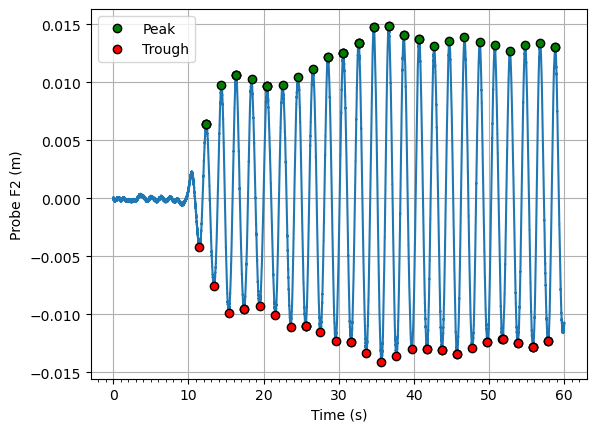

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.signal import find_peaks

#%matplotlib qt
%matplotlib inline

# Create the plot
fig, ax = plt.subplots()
ax.plot(df15['time [s]'], df15['ProbeF2 [m]'])

# Find peaks and troughs
peaks, _ = find_peaks(df15['ProbeF2 [m]'], prominence=0.005) # Adjust prominence threshold as needed
troughs, _ = find_peaks(-df15['ProbeF2 [m]'], prominence=0.005)  # Use negative values to find troughs

# Plot markers for peaks and troughs
ax.plot(df15['time [s]'][peaks], df15['ProbeF2 [m]'][peaks], 'go', label='Peak',markeredgecolor = 'black') 
ax.plot(df15['time [s]'][troughs], df15['ProbeF2 [m]'][troughs], 'ro', label='Trough',markeredgecolor = 'black') 

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probe F2 (m)')

# Set ticks every 10 seconds
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Set minor ticks every 1 second
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.grid(True)

# Show the legend
ax.legend()


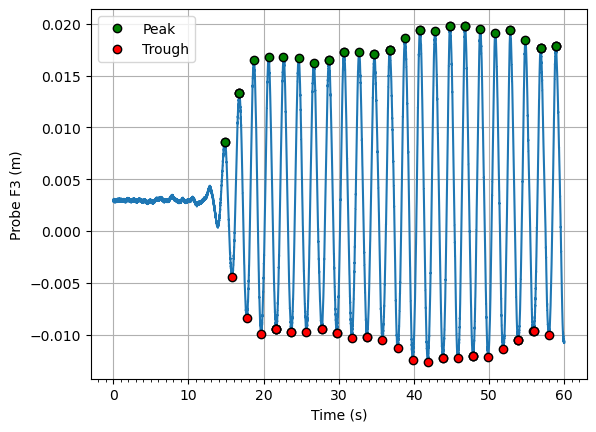

In [6]:
#%matplotlib qt
%matplotlib inline

# Create the plot
fig, ax = plt.subplots()
ax.plot(df15['time [s]'], df15['ProbeF3 [m]'])

# Find peaks and troughs
peaks_, _ = find_peaks(df15['ProbeF3 [m]'], prominence=0.005) # Adjust prominence threshold as needed
troughs_, _ = find_peaks(-df15['ProbeF3 [m]'], prominence=0.005)  # Use negative values to find troughs

# Plot markers for peaks and troughs
ax.plot(df15['time [s]'][peaks_], df15['ProbeF3 [m]'][peaks_], 'go', label='Peak',markeredgecolor = 'black') 
ax.plot(df15['time [s]'][troughs_], df15['ProbeF3 [m]'][troughs_], 'ro', label='Trough',markeredgecolor = 'black') 

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probe F3 (m)')

# Set ticks every 10 seconds
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Set minor ticks every 1 second
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.grid(True)

# Show the legend
ax.legend()

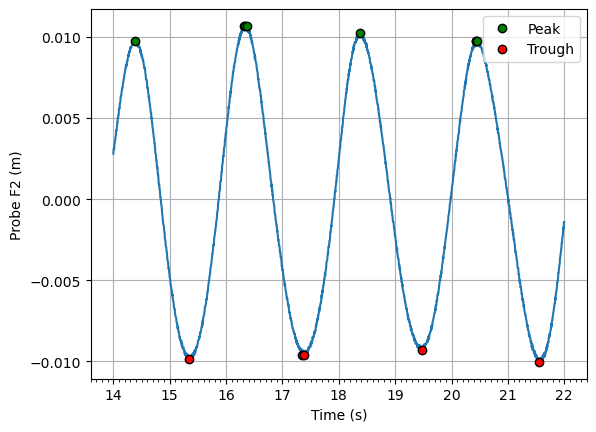

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.signal import find_peaks

# Define the time range
start_time_probe_f2 = 14
end_time_probe_f2 = 22

# Create the plot
fig, ax = plt.subplots()

# Filter ProbeC2 data corresponding to the calculated time range
probe_f2_data = df15[(df15['time [s]'] >= start_time_probe_f2) & (df15['time [s]'] <= end_time_probe_f2)]

# Find peaks and troughs
peaks_f2, _ = find_peaks(probe_f2_data['ProbeF2 [m]'], prominence=0.005) # Adjust prominence threshold as needed
troughs_f2, _ = find_peaks(-probe_f2_data['ProbeF2 [m]'], prominence=0.005)  # Use negative values to find troughs

ax.plot(probe_f2_data['time [s]'], probe_f2_data['ProbeF2 [m]'])

# Plot markers for peaks and troughs
ax.plot(probe_f2_data['time [s]'].iloc[peaks_f2], probe_f2_data['ProbeF2 [m]'].iloc[peaks_f2], 'go', label='Peak', markeredgecolor='black')  
ax.plot(probe_f2_data['time [s]'].iloc[troughs_f2], probe_f2_data['ProbeF2 [m]'].iloc[troughs_f2], 'ro', label='Trough', markeredgecolor='black')  

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probe F2 (m)')

# Set ticks every 10 seconds
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# Set minor ticks every 1 second
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

ax.grid(True)

# Show the legend
ax.legend()


In [8]:
import numpy as np

# Find nearest trough for each peak
nearest_troughs = []
for peak_idx in peaks_f2:
    nearest_trough_idx = troughs_f2[np.abs(troughs_f2 - peak_idx).argmin()]
    nearest_troughs.append(nearest_trough_idx)

# Calculate amplitudes for each peak-trough pair
amplitudes_f2 = (probe_f2_data['ProbeF2 [m]'].iloc[peaks_f2].values - probe_f2_data['ProbeF2 [m]'].iloc[nearest_troughs].values)/2

# Compute the average amplitude
average_amplitude_f2 = np.mean(amplitudes_f2)

print("Average amplitude between 22 and 30 seconds:", average_amplitude_f2)

df15['average_amplitude_f2']=average_amplitude_f2

Average amplitude between 22 and 30 seconds: 0.009861312221349249


In [9]:
# Define constants
g=9.81
df15['frequency']=0.5
df15['k0']=(2 * np.pi*df15['frequency'])**2/g
df15['k0h']=df15['k0']*df15['depth [m]']


In [10]:
from scipy.optimize import fsolve

k0h = df15['k0h'].iloc[0]

# Define the function
def equations(kh):
    return kh * np.tanh(kh) - k0h

# Solve the equation using fsolve
kh_solution = fsolve(equations, k0h)
df15['kh'] = kh_solution[0]
print("Solution for kh:", kh_solution)
df15

Solution for kh: [0.72803224]


,time [s],Delta_p [Pa],WaveMaker [m],ProbeC1 [m],ProbeC2 [m],ProbeF2 [m],ProbeF3 [m],Himp [m],L_F2 [m],L_F3 [m],depth [m],w_OWC [m],D_orif [m],Q,P_pneu,average_amplitude_f2,frequency,k0,k0h,kh
0,0.000,-1.583679,0.059826,0.000420,0.000386,0.000075,0.002884,0.0297,9.5,14.0,0.45,0.53,0.01,-0.000063,0.000100,0.009861,0.5,1.006076,0.452734,0.728032
1,0.005,-1.583679,0.059630,0.000470,0.000334,0.000116,0.002884,NaN,NaN,NaN,NaN,NaN,NaN,-0.000063,0.000100,0.009861,0.5,1.006076,NaN,0.728032
2,0.010,-1.067199,0.059630,0.000521,0.000282,-0.000131,0.003024,NaN,NaN,NaN,NaN,NaN,NaN,-0.000052,0.000055,0.009861,0.5,1.006076,NaN,0.728032
3,0.015,-1.325439,0.059658,0.000470,0.000386,-0.000090,0.003071,NaN,NaN,NaN,NaN,NaN,NaN,-0.000058,0.000077,0.009861,0.5,1.006076,NaN,0.728032
4,0.020,-0.808959,0.059658,0.000269,0.000334,0.000075,0.003071,NaN,NaN,NaN,NaN,NaN,NaN,-0.000045,0.000037,0.009861,0.5,1.006076,NaN,0.728032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,59.975,111.008901,0.046548,0.016260,0.016662,-0.010768,-0.010815,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058687,0.009861,0.5,1.006076,NaN,0.728032
11996,59.980,111.008901,0.046716,0.016562,0.016951,-0.010892,-0.010581,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058687,0.009861,0.5,1.006076,NaN,0.728032
11997,59.985,111.267141,0.046576,0.016814,0.017265,-0.010768,-0.010721,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058892,0.009861,0.5,1.006076,NaN,0.728032
11998,59.990,108.426502,0.046576,0.017115,0.017580,-0.010686,-0.010581,NaN,NaN,NaN,NaN,NaN,NaN,0.000522,0.056651,0.009861,0.5,1.006076,NaN,0.728032


In [11]:
df15['k']=df15['kh']/df15['depth [m]']
df15['λ']=2*np.pi/df15['k']
df15['λ/h']=df15['λ']/df15['depth [m]']
df15['cp']=2*np.pi*df15['frequency']/(df15['k'])
df15['cg']=(df15['cp']/2)*(1+(2*df15['kh']/np.sinh(2*df15['kh'])))
df15['CtoF2']=(17.35-df15['L_F2 [m]'])/df15['cg']
df15['F2toF3']=(df15['L_F3 [m]']-df15['L_F2 [m]'])/df15['cg']
df15

,time [s],Delta_p [Pa],WaveMaker [m],ProbeC1 [m],ProbeC2 [m],ProbeF2 [m],ProbeF3 [m],Himp [m],L_F2 [m],L_F3 [m],depth [m],w_OWC [m],D_orif [m],Q,P_pneu,average_amplitude_f2,frequency,k0,k0h,kh,k,λ,λ/h,cp,cg,CtoF2,F2toF3
0,0.000,-1.583679,0.059826,0.000420,0.000386,0.000075,0.002884,0.0297,9.5,14.0,0.45,0.53,0.01,-0.000063,0.000100,0.009861,0.5,1.006076,0.452734,0.728032,1.617849,3.883665,8.630367,1.941833,1.668033,4.706141,2.697788
1,0.005,-1.583679,0.059630,0.000470,0.000334,0.000116,0.002884,NaN,NaN,NaN,NaN,NaN,NaN,-0.000063,0.000100,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.010,-1.067199,0.059630,0.000521,0.000282,-0.000131,0.003024,NaN,NaN,NaN,NaN,NaN,NaN,-0.000052,0.000055,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.015,-1.325439,0.059658,0.000470,0.000386,-0.000090,0.003071,NaN,NaN,NaN,NaN,NaN,NaN,-0.000058,0.000077,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.020,-0.808959,0.059658,0.000269,0.000334,0.000075,0.003071,NaN,NaN,NaN,NaN,NaN,NaN,-0.000045,0.000037,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,59.975,111.008901,0.046548,0.016260,0.016662,-0.010768,-0.010815,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058687,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11996,59.980,111.008901,0.046716,0.016562,0.016951,-0.010892,-0.010581,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058687,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11997,59.985,111.267141,0.046576,0.016814,0.017265,-0.010768,-0.010721,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058892,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,59.990,108.426502,0.046576,0.017115,0.017580,-0.010686,-0.010581,NaN,NaN,NaN,NaN,NaN,NaN,0.000522,0.056651,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN


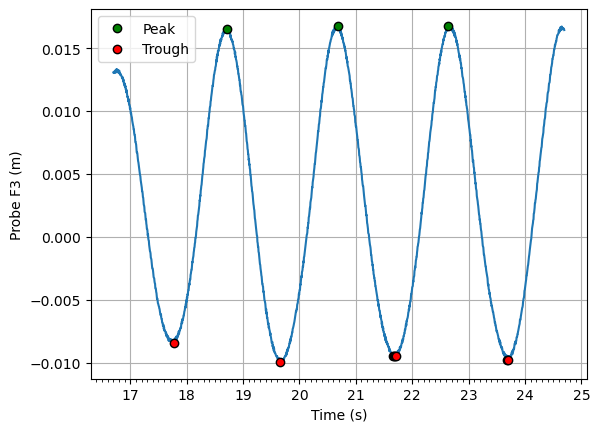

In [12]:
time_difference = df15['F2toF3'].iloc[0]
# Define the time range
start_time_probe_f3 = start_time_probe_f2+time_difference
end_time_probe_f3 = end_time_probe_f2+time_difference

# Create the plot
fig, ax = plt.subplots()

# Filter ProbeC2 data corresponding to the calculated time range
probe_f3_data = df15[(df15['time [s]'] >= start_time_probe_f3) & (df15['time [s]'] <= end_time_probe_f3)]

# Find peaks and troughs
peaks_f3, _ = find_peaks(probe_f3_data['ProbeF3 [m]'], prominence=0.005) # Adjust prominence threshold as needed
troughs_f3, _ = find_peaks(-probe_f3_data['ProbeF3 [m]'], prominence=0.005)  # Use negative values to find troughs

ax.plot(probe_f3_data['time [s]'], probe_f3_data['ProbeF3 [m]'])

# Plot markers for peaks and troughs
ax.plot(probe_f3_data['time [s]'].iloc[peaks_f3], probe_f3_data['ProbeF3 [m]'].iloc[peaks_f3], 'go', label='Peak', markeredgecolor='black')  
ax.plot(probe_f3_data['time [s]'].iloc[troughs_f3], probe_f3_data['ProbeF3 [m]'].iloc[troughs_f3], 'ro', label='Trough', markeredgecolor='black')  

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probe F3 (m)')

# Set ticks every 10 seconds
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# Set minor ticks every 1 second
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

ax.grid(True)

# Show the legend
ax.legend()


In [13]:
# Find nearest trough for each peak
nearest_troughs = []
for peak_idx in peaks_f3:
    nearest_trough_idx = troughs_f3[np.abs(troughs_f3 - peak_idx).argmin()]
    nearest_troughs.append(nearest_trough_idx)

# Calculate amplitudes for each peak-trough pair
amplitudes_f3 = (probe_f3_data['ProbeF3 [m]'].iloc[peaks_f3].values - probe_f3_data['ProbeF3 [m]'].iloc[nearest_troughs].values)/2

# Compute the average amplitude
average_amplitude_f3 = np.mean(amplitudes_f3)

print("Average amplitude between 22 and 30 seconds:", average_amplitude_f3)

df15['average_amplitude_f3']=average_amplitude_f3

Average amplitude between 22 and 30 seconds: 0.012895827036687625


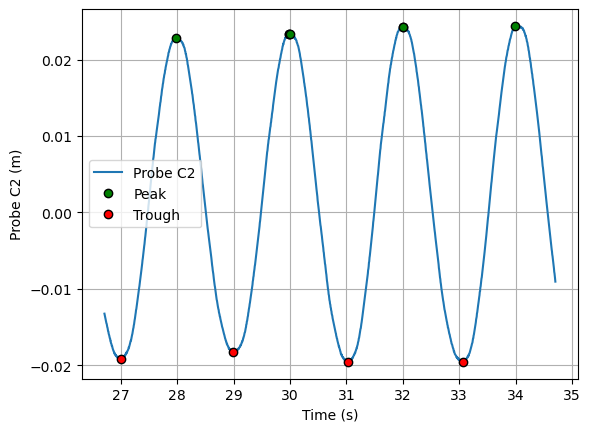

In [14]:

time_difference_c2 = df15['CtoF2'].iloc[0]
start_time_probe_c2 = 22 + time_difference_c2
end_time_probe_c2 = 30 + time_difference_c2

# Filter ProbeC2 data corresponding to the calculated time range
probe_c2_data = df15[(df15['time [s]'] >= start_time_probe_c2) & (df15['time [s]'] <= end_time_probe_c2)]

# Find peaks and troughs for ProbeC2
peaks_c2, _ = find_peaks(probe_c2_data ['ProbeC2 [m]'], prominence=0.001)  # Adjust prominence threshold as needed
troughs_c2, _ = find_peaks(-probe_c2_data ['ProbeC2 [m]'], prominence=0.001)  # Use negative values to find troughs

fig, ax = plt.subplots()

# Plot ProbeC2 values against time
ax.plot(probe_c2_data['time [s]'], probe_c2_data['ProbeC2 [m]'], label='Probe C2')

# Plot markers for peaks and troughs
ax.plot(probe_c2_data['time [s]'].iloc[peaks_c2], probe_c2_data['ProbeC2 [m]'].iloc[peaks_c2], 'go', label='Peak', markeredgecolor='black')
ax.plot(probe_c2_data['time [s]'].iloc[troughs_c2], probe_c2_data['ProbeC2 [m]'].iloc[troughs_c2], 'ro', label='Trough', markeredgecolor='black')

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probe C2 (m)')

ax.legend()
ax.grid(True)


In [15]:
# Find nearest trough for each peak
nearest_troughs_c2 = []
for peak_idx in peaks_c2:
    nearest_trough_c2_idx = troughs_c2[np.abs(troughs_c2 - peak_idx).argmin()]
    nearest_troughs_c2.append(nearest_trough_c2_idx)

# Calculate amplitudes of each peak-trough pair for ProbeC2
amplitudes_c2 = (probe_c2_data['ProbeC2 [m]'].iloc[peaks_c2].values - probe_c2_data['ProbeC2 [m]'].iloc[nearest_troughs_c2].values)/2
 
# Compute the average amplitude for ProbeC2
average_amplitude_c2 = np.mean(amplitudes_c2)

print("Average amplitude for ProbeC2 within the time interval:", average_amplitude_c2)
df15['average_amplitude_c2']=average_amplitude_c2

Average amplitude for ProbeC2 within the time interval: 0.02131583625826311


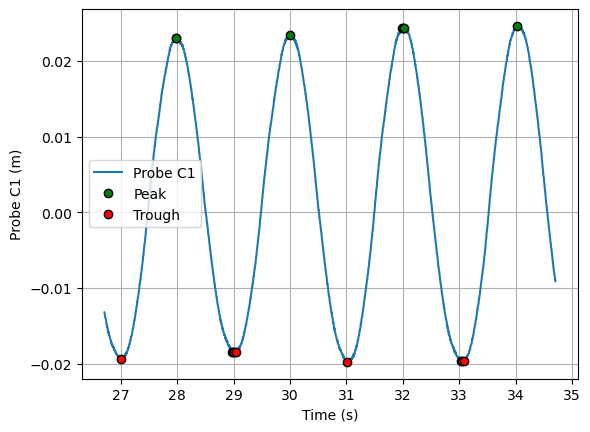

In [16]:


# Find peaks and troughs for ProbeC2
peaks_c1, _ = find_peaks(probe_c2_data ['ProbeC1 [m]'], prominence=0.001)  # Adjust prominence threshold as needed
troughs_c1, _ = find_peaks(-probe_c2_data ['ProbeC1 [m]'], prominence=0.001)  # Use negative values to find troughs

fig, ax = plt.subplots()

# Plot ProbeC2 values against time
ax.plot(probe_c2_data['time [s]'], probe_c2_data['ProbeC1 [m]'], label='Probe C1')

# Plot markers for peaks and troughs
ax.plot(probe_c2_data['time [s]'].iloc[peaks_c1], probe_c2_data['ProbeC1 [m]'].iloc[peaks_c1], 'go', label='Peak', markeredgecolor='black')
ax.plot(probe_c2_data['time [s]'].iloc[troughs_c1], probe_c2_data['ProbeC1 [m]'].iloc[troughs_c1], 'ro', label='Trough', markeredgecolor='black')

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probe C1 (m)')

ax.legend()
ax.grid(True)


In [17]:
# Find nearest trough for each peak
nearest_troughs_c1 = []
for peak_idx in peaks_c1:
    nearest_trough_c1_idx = troughs_c1[np.abs(troughs_c1 - peak_idx).argmin()]
    nearest_troughs_c1.append(nearest_trough_c1_idx)

# Calculate amplitudes of each peak-trough pair for ProbeC2
amplitudes_c1 = (probe_c2_data['ProbeC1 [m]'].iloc[peaks_c1].values - probe_c2_data['ProbeC1 [m]'].iloc[nearest_troughs_c1].values)/2
 
# Compute the average amplitude for ProbeC2
average_amplitude_c1 = np.mean(amplitudes_c1)

print("Average amplitude for ProbeC1 within the time interval:", average_amplitude_c1)
df15['average_amplitude_c1']=average_amplitude_c1

Average amplitude for ProbeC1 within the time interval: 0.021623298483330087


In [18]:
df15['P_pneu_avg']=probe_c2_data['P_pneu'].mean()
df15

,time [s],Delta_p [Pa],WaveMaker [m],ProbeC1 [m],ProbeC2 [m],ProbeF2 [m],ProbeF3 [m],Himp [m],L_F2 [m],L_F3 [m],depth [m],w_OWC [m],D_orif [m],Q,P_pneu,average_amplitude_f2,frequency,k0,k0h,kh,k,λ,λ/h,cp,cg,CtoF2,F2toF3,average_amplitude_f3,average_amplitude_c2,average_amplitude_c1,P_pneu_avg
0,0.000,-1.583679,0.059826,0.000420,0.000386,0.000075,0.002884,0.0297,9.5,14.0,0.45,0.53,0.01,-0.000063,0.000100,0.009861,0.5,1.006076,0.452734,0.728032,1.617849,3.883665,8.630367,1.941833,1.668033,4.706141,2.697788,0.012896,0.021316,0.021623,0.028238
1,0.005,-1.583679,0.059630,0.000470,0.000334,0.000116,0.002884,NaN,NaN,NaN,NaN,NaN,NaN,-0.000063,0.000100,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238
2,0.010,-1.067199,0.059630,0.000521,0.000282,-0.000131,0.003024,NaN,NaN,NaN,NaN,NaN,NaN,-0.000052,0.000055,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238
3,0.015,-1.325439,0.059658,0.000470,0.000386,-0.000090,0.003071,NaN,NaN,NaN,NaN,NaN,NaN,-0.000058,0.000077,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238
4,0.020,-0.808959,0.059658,0.000269,0.000334,0.000075,0.003071,NaN,NaN,NaN,NaN,NaN,NaN,-0.000045,0.000037,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,59.975,111.008901,0.046548,0.016260,0.016662,-0.010768,-0.010815,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058687,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238
11996,59.980,111.008901,0.046716,0.016562,0.016951,-0.010892,-0.010581,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058687,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238
11997,59.985,111.267141,0.046576,0.016814,0.017265,-0.010768,-0.010721,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058892,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238
11998,59.990,108.426502,0.046576,0.017115,0.017580,-0.010686,-0.010581,NaN,NaN,NaN,NaN,NaN,NaN,0.000522,0.056651,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238


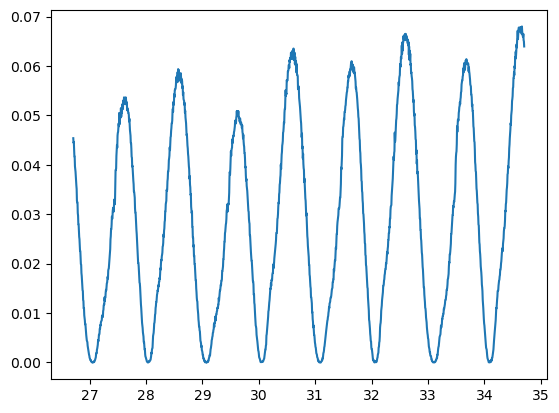

In [19]:
# Plot ProbeC2 values against time
plt.plot(probe_c2_data['time [s]'], probe_c2_data['P_pneu'])

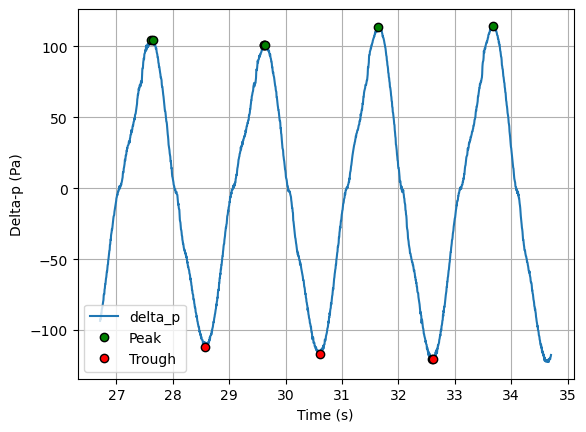

In [20]:
# Find peaks and troughs for ProbeC2
peaks_delta_p, _ = find_peaks(probe_c2_data ['Delta_p [Pa]'], prominence=5)  # Adjust prominence threshold as needed
troughs_delta_p, _ = find_peaks(-probe_c2_data ['Delta_p [Pa]'], prominence=5)  # Use negative values to find troughs

fig, ax = plt.subplots()

# Plot ProbeC2 values against time
ax.plot(probe_c2_data['time [s]'], probe_c2_data['Delta_p [Pa]'], label='delta_p')

# Plot markers for peaks and troughs
ax.plot(probe_c2_data['time [s]'].iloc[peaks_delta_p], probe_c2_data['Delta_p [Pa]'].iloc[peaks_delta_p], 'go', label='Peak', markeredgecolor='black')
ax.plot(probe_c2_data['time [s]'].iloc[troughs_delta_p], probe_c2_data['Delta_p [Pa]'].iloc[troughs_delta_p], 'ro', label='Trough', markeredgecolor='black')

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Delta-p (Pa)')

ax.legend()
ax.grid(True)

In [21]:
# Find nearest trough for each peak
nearest_troughs_delta_p = []
for peak_idx in peaks_delta_p:
    nearest_trough_delta_p_idx = troughs_delta_p[np.abs(troughs_delta_p - peak_idx).argmin()]
    nearest_troughs_delta_p.append(nearest_trough_delta_p_idx)

# Calculate amplitudes of each peak-trough pair for ProbeC2
amplitudes_delta_p = (probe_c2_data['Delta_p [Pa]'].iloc[peaks_delta_p].values - probe_c2_data['Delta_p [Pa]'].iloc[nearest_troughs_delta_p].values)/2
 
# Compute the average amplitude for ProbeC2
average_amplitude_delta_p = np.mean(amplitudes_delta_p)

print("Average amplitude for delta_p within the time interval:", average_amplitude_delta_p)
df15['average_amplitude_delta_p']=average_amplitude_delta_p

Average amplitude for delta_p within the time interval: 111.15381507555607


In [22]:
df15['RAO_OWC']=df15['average_amplitude_c1']/df15['average_amplitude_f2']
df15['RAO_delta_p']=df15['average_amplitude_delta_p']/df15['average_amplitude_f2']
df15['Pwave']=df15['cg']*0.5*9.81*1000*df15['average_amplitude_f2']**2
df15['PwaveXwidth']=df15['Pwave']*df15['w_OWC [m]']
df15['CWR']=df15['P_pneu_avg']/df15['PwaveXwidth']
df15

,time [s],Delta_p [Pa],WaveMaker [m],ProbeC1 [m],ProbeC2 [m],ProbeF2 [m],ProbeF3 [m],Himp [m],L_F2 [m],L_F3 [m],depth [m],w_OWC [m],D_orif [m],Q,P_pneu,average_amplitude_f2,frequency,k0,k0h,kh,k,λ,λ/h,cp,cg,CtoF2,F2toF3,average_amplitude_f3,average_amplitude_c2,average_amplitude_c1,P_pneu_avg,average_amplitude_delta_p,RAO_OWC,RAO_delta_p,Pwave,PwaveXwidth,CWR
0,0.000,-1.583679,0.059826,0.000420,0.000386,0.000075,0.002884,0.0297,9.5,14.0,0.45,0.53,0.01,-0.000063,0.000100,0.009861,0.5,1.006076,0.452734,0.728032,1.617849,3.883665,8.630367,1.941833,1.668033,4.706141,2.697788,0.012896,0.021316,0.021623,0.028238,111.153815,2.19274,11271.706298,0.795634,0.421686,0.066965
1,0.005,-1.583679,0.059630,0.000470,0.000334,0.000116,0.002884,NaN,NaN,NaN,NaN,NaN,NaN,-0.000063,0.000100,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238,111.153815,2.19274,11271.706298,NaN,NaN,NaN
2,0.010,-1.067199,0.059630,0.000521,0.000282,-0.000131,0.003024,NaN,NaN,NaN,NaN,NaN,NaN,-0.000052,0.000055,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238,111.153815,2.19274,11271.706298,NaN,NaN,NaN
3,0.015,-1.325439,0.059658,0.000470,0.000386,-0.000090,0.003071,NaN,NaN,NaN,NaN,NaN,NaN,-0.000058,0.000077,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238,111.153815,2.19274,11271.706298,NaN,NaN,NaN
4,0.020,-0.808959,0.059658,0.000269,0.000334,0.000075,0.003071,NaN,NaN,NaN,NaN,NaN,NaN,-0.000045,0.000037,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238,111.153815,2.19274,11271.706298,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,59.975,111.008901,0.046548,0.016260,0.016662,-0.010768,-0.010815,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058687,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238,111.153815,2.19274,11271.706298,NaN,NaN,NaN
11996,59.980,111.008901,0.046716,0.016562,0.016951,-0.010892,-0.010581,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058687,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238,111.153815,2.19274,11271.706298,NaN,NaN,NaN
11997,59.985,111.267141,0.046576,0.016814,0.017265,-0.010768,-0.010721,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,0.058892,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238,111.153815,2.19274,11271.706298,NaN,NaN,NaN
11998,59.990,108.426502,0.046576,0.017115,0.017580,-0.010686,-0.010581,NaN,NaN,NaN,NaN,NaN,NaN,0.000522,0.056651,0.009861,0.5,1.006076,NaN,0.728032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012896,0.021316,0.021623,0.028238,111.153815,2.19274,11271.706298,NaN,NaN,NaN


In [23]:
# Select specific rows and columns from df15
df_result = df15.iloc[[0], [16 ,15, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]

# Assign column names to df_result
df_result.columns = df15.columns[[16 ,15, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
# Reset the index of df_result and drop the previous index
df_result.set_index('frequency', inplace=True)

df_result

,average_amplitude_f2,k0,k0h,kh,k,λ,λ/h,cp,cg,average_amplitude_f3,average_amplitude_c2,average_amplitude_c1,P_pneu_avg,average_amplitude_delta_p,RAO_OWC,RAO_delta_p,Pwave,PwaveXwidth,CWR
frequency,,,,,,,,,,,,,,,,,,,
0.5,0.009861,1.006076,0.452734,0.728032,1.617849,3.883665,8.630367,1.941833,1.668033,0.012896,0.021316,0.021623,0.028238,111.153815,2.19274,11271.706298,0.795634,0.421686,0.066965


In [26]:
# Write the DataFrame to an Excel file
df_result.to_excel("df_result.xlsx")